<a href="https://colab.research.google.com/github/Rpmalukani22/Deep-learning-coursera/blob/master/MNIST_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np

In [0]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist=input_data.read_data_sets("MNIST_data/",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [5]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [6]:
mnist.train.num_examples

55000

In [7]:
mnist.test.num_examples

10000

In [0]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

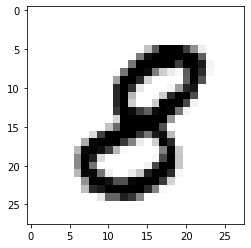

In [9]:
plt.imshow(mnist.train.images[5].reshape(28,28),cmap=matplotlib.cm.binary)

In [0]:
x=tf.placeholder(tf.float32,shape=[None,784])
w=tf.Variable(tf.zeros([784,10]))
b=tf.Variable(tf.zeros([10]))

In [0]:
y=x@w+b

In [0]:
y_true=tf.placeholder(tf.float32,[None,10])

In [13]:
corss_entropy=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true,logits=y))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [0]:
optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.5)
train=optimizer.minimize(corss_entropy)

In [0]:
init=tf.global_variables_initializer()

In [16]:
with tf.Session() as sess:
  sess.run(init)
  for step in range(1000):
    batch_x,batch_y=mnist.train.next_batch(100)
    sess.run(train,feed_dict={x:batch_x,y_true:batch_y})
  yp=sess.run(y,feed_dict={x:mnist.train.images})
  compare=tf.equal(tf.argmax(yp,1),tf.argmax(mnist.train.labels,1))
  acc=tf.reduce_mean(tf.cast(compare,tf.float32))
  print(sess.run(acc)*100)

91.47999882698059
